In [1]:
# importing necessary libraries

import time
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from sympy import Matrix, init_printing
from sympy import Symbol 
from mpl_toolkits import mplot3d
from simple_colors import *

In [2]:
# Setting up the given or known values
c = 299792.458
ro = 26570 
d = 0.0001

# setting up empty arrays for phi, theta, A, B, C, R, and t to fill them later after calculation
phi = np.zeros(4)
theta = np.zeros(4)
A = np.zeros(4)
B = np.zeros(4)
C = np.zeros(4)
R = np.zeros(4)
t = np.zeros(4)

# setting up for loop for calculating phi, theta, and corresponding array of A, B, C, R, and t
for i in range(1,5):
    phi[i-1] = (i*np.pi)/8
    theta[i-1] = (i-1)*np.pi/2
    A[i-1] = ro*np.cos(phi[i-1])*np.cos(theta[i-1])
    B[i-1] = ro*np.cos(phi[i-1])*np.sin(theta[i-1]) 
    C[i-1] = ro*np.sin(phi[i-1])
    R[i-1] = np.sqrt(A[i-1]**2 + B[i-1]**2 + (C[i-1]-6370)**2)
    t[i-1] = d + R[i-1]/c 
    

# setting up augmented matrix to calculate x, y, z, d. # Since we had 4 unknowns and 3 equations, the system is inconsistent. 
# We express  𝑥,𝑦,𝑧  in terms of d after solving the system using augmented matrix.

M = Matrix([[2*(A[3]-A[0]), 2*(B[3] - B[0]), 2*(C[3] - C[0]), -2*(c**2)*(t[3]-t[0]), (c**2)*(t[0]**2 - t[3]**2) - A[0]**2 + A[3]**2 - B[0]**2 + B[3]**2 - C[0]**2 + C[3]**2],
           [2*(A[2]-A[0]), 2*(B[2] - B[0]), 2*(C[2] - C[0]), -2*(c**2)*(t[2]-t[0]), (c**2)*(t[0]**2 - t[2]**2) - A[0]**2 + A[2]**2 - B[0]**2 + B[2]**2 - C[0]**2 + C[2]**2],
           [2*(A[1]-A[0]), 2*(B[1] - B[0]), 2*(C[1] - C[0]), -2*(c**2)*(t[1]-t[0]), (c**2)*(t[0]**2 - t[1]**2) - A[0]**2 + A[1]**2 - B[0]**2 + B[1]**2 - C[0]**2 + C[1]**2]])


# using Gauss-Jordan rref calculate x, y, z, d
M_rref,q = M.rref()
print(blue('The matrix after rref is below',['bold','bright']))
print(M_rref)
print()

# expressing  𝑥,𝑦,𝑧  in terms of d

d = smp.symbols('d')
p = -M_rref[0,3]*d + M_rref[0,4]
q = -M_rref[1,3]*d + M_rref[1,4]
r = -M_rref[2,3]*d + M_rref[2,4]
print(blue('x in terms of d=',['bold','bright']), p)
print(blue('y in terms of d=',['bold','bright']), q)
print(blue('z in terms of d=',['bold','bright']), r)

# Substituting the 𝑥,𝑦,𝑧  values in the equation to get quadratic equation in one variable  𝑑 .

eq = (p - A[0])**2 + (q - B[0])**2 + (r - C[0])**2 - (c*(t[0]-d))**2

# simplifying it 
eq1 = smp.simplify(eq)
print(blue('The quadratic equation is:',['bold','bright']), eq1)

The matrix after rref is below
Matrix([[1, 0, 0, 1270.90445499704, 0.127090445500859], [0, 1, 0, -1118.66226324829, -0.111866226324805], [0, 0, 1, 86702.1069978110, 6378.67021069978]])

x in terms of d= 0.127090445500859 - 1270.90445499704*d
y in terms of d= 1118.66226324829*d - 0.111866226324805
z in terms of d= 6378.67021069978 - 86702.106997811*d
The quadratic equation is: -82355395912.4289*d**2 + 15630851505.094*d - 1562261.59655011


In [3]:
#calculating the time involved in these steps
start = time. time()

# collecting the coefficients into array
sol = np.zeros((1,2))
coeff = np.array([[-82355395912.4289, 15630851505.094, -1562261.59655011]])

# calculating the solutions to quadratic equation
for i in range(0,1):
    a = coeff[i,0]
    b = coeff[i,1]
    c1 = coeff[i,2]
    disc = (b**2)-(4*a*c1)
    sol[i,0] = ((-b) + np.sqrt(disc))/(2*a)
    sol[i,1] = ((-b) - np.sqrt(disc))/(2*a)
print(blue('The two solutions are:',['bold','bright']),sol)

#finding the coordinates

print()
print()

print(green('Since the norm with first solution is approximately equal to the radius of the earth, we are considering this first solution',['bold', 'reverse']))    

# Now, using first solution to get coordinates x, y,z.
print(blue('Coordinates and norm with d =',['bold', 'bright']), sol[0,0])
coor1 = np.array([-M_rref[0,3]*sol[0,0] + M_rref[0,4], -M_rref[1,3]*sol[0,0] + M_rref[1,4], -M_rref[2,3]*sol[0,0] + M_rref[2,4]])
print(blue('The x coordinate is=',['bold']), coor1[0])
print(blue('The y coordinate is=',['bold']), coor1[1])
print(blue('The z coordinate is=',['bold']), coor1[2])

#calculating infinity norm of the vector ||x,y,z||
norm2a = np.linalg.norm(coor1.reshape(3,1), np.inf) 
print(blue('The norm is=',['bold']), norm2a)

#print('----------------------________')

print()
print()

# Now, using second solution to get coordinates x, y,z.
print(red('Since the norm with second solution is larger than the radius of the earth, we are not considering this second solution',['bold', 'reverse']))    

print(blue('Coordinates and norm with d =',['bold', 'bright']), sol[0,1])
coor2 = np.array([-M_rref[0,3]*sol[0,1] + M_rref[0,4], -M_rref[1,3]*sol[0,1] + M_rref[1,4], -M_rref[2,3]*sol[0,1] + M_rref[2,4]])
print(blue('The x coordinate is=',['bold']), coor2[0])
print(blue('The y coordinate is=',['bold']), coor2[1])
print(blue('The z coordinate is=',['bold']), coor2[2])

#calculating infinity norm of the vector ||x,y,z||
norm2b = np.linalg.norm(coor2.reshape(3,1), np.inf) 
print(blue('The norm is=',['bold']), norm2b)

print()
print()

end = time. time()
print(magenta('The execution time is=',['bold']),end - start)

The two solutions are: [[1.00000000e-04 1.89697539e-01]]


Since the norm with first solution is approximately equal to the radius of the earth, we are considering this first solution
Coordinates and norm with d = 9.999999999998721e-05
The x coordinate is= 1.17114651310146e-12
The y coordinate is= 9.22872889219661e-15
The z coordinate is= 6370.00000000000
The norm is= 6370.00000000000


Since the norm with second solution is larger than the radius of the earth, we are not considering this second solution
Coordinates and norm with d = 0.18969753945588194
The x coordinate is= -240.960357550957
The y coordinate is= 212.095612594024
The z coordinate is= -10068.5061524256
The norm is= 10068.5061524256


The execution time is= 0.0039784908294677734


<IPython.core.display.Javascript object>


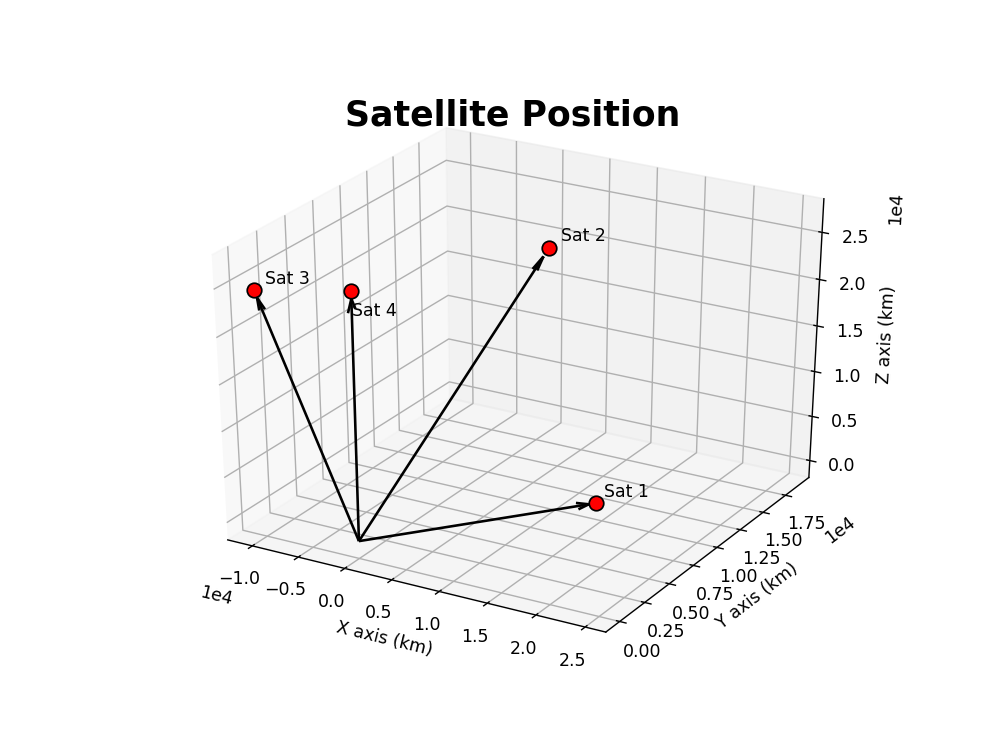

In [4]:
# plotting the coordinates of four satellites

%matplotlib notebook
plt.figure(figsize=(8,6))
ax = plt.axes(projection = '3d')
ax.set_facecolor('white')
ax.scatter(A, B, C, marker='o',s = 70, color = 'red', edgecolor='black', depthshade=False)
ax.set_title('Satellite Position',fontweight='bold', size=20)
ax.set_xlabel('X axis (km)')
ax.set_ylabel('Y axis (km)')
ax.set_zlabel('Z axis (km)')
ax.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
ax.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
ax.ticklabel_format(axis='z', style='sci',scilimits=(0,0))
ax.text3D(2.45474792e+04,800, 10167.89879794,"Sat 1")
ax.text3D(1.15042262e-12,20000, 18787.82717613,"Sat 2")
ax.text3D(-1.01678988e+04,1000, 24547.47917882,"Sat 3")
ax.text3D(-2.98864631e-28,-1.62694327e-12, 24000,"Sat 4")
start = [0,0,0]
ax.quiver(start[0],start[1],start[2],A[0],B[0],C[0],arrow_length_ratio=0.05, color='black', length=0.97)
ax.quiver(start[0],start[1],start[2],A[1],B[1],C[1],arrow_length_ratio=0.05, color='black', length=0.97)
ax.quiver(start[0],start[1],start[2],A[2],B[2],C[2],arrow_length_ratio=0.05,color='black',length=0.97)
ax.quiver(start[0],start[1],start[2],A[3],B[3],C[3],arrow_length_ratio=0.05, color='black', length=0.97)
plt.show()
plt.savefig('401.png', dpi = 400, bbox_inches='tight')

## Finding all four quadratic equations

In [5]:
# creating function for new t array with added delta t
newt = np.zeros(4)
def fn(e1,e2,e3,e4):
    newt[0] = t[0] + e1
    newt[1] = t[1] + e2
    newt[2] = t[2] + e3
    newt[3] = t[3] + e4
    
    inperr = c*np.linalg.norm(t.reshape(4,1) - newt.reshape(4,1), np.inf)
    print(magenta('The input error=',['bold', 'bright']), inperr)
    
# setting up augmented matrix to calculate x, y, z, d. # Since we had 4 unknowns and 3 equations, the system is inconsistent. 
# We express  𝑥,𝑦,𝑧  in terms of d after solving the system using augmented matrix.  

    M1 = Matrix([[2*(A[3]-A[0]), 2*(B[3] - B[0]), 2*(C[3] - C[0]), -2*(c**2)*(newt[3]-newt[0]), (c**2)*(newt[0]**2 - newt[3]**2) - A[0]**2 + A[3]**2 - B[0]**2 + B[3]**2 - C[0]**2 + C[3]**2],
           [2*(A[2]-A[0]), 2*(B[2] - B[0]), 2*(C[2] - C[0]), -2*(c**2)*(newt[2]-newt[0]), (c**2)*(newt[0]**2 - newt[2]**2) - A[0]**2 + A[2]**2 - B[0]**2 + B[2]**2 - C[0]**2 + C[2]**2],
           [2*(A[1]-A[0]), 2*(B[1] - B[0]), 2*(C[1] - C[0]), -2*(c**2)*(newt[1]-newt[0]), (c**2)*(newt[0]**2 - newt[1]**2) - A[0]**2 + A[1]**2 - B[0]**2 + B[1]**2 - C[0]**2 + C[1]**2]])


# using Gauss-Jordan rref calculate x, y, z, d
    M_rref1,q1 = M1.rref()
    print(yellow('The matrix after rref operations is given below',['bold', 'reverse']))
    print(M_rref1)

# expressing  𝑥,𝑦,𝑧  in terms of d

    d1 = smp.symbols('d1')
    p1 = -M_rref1[0,3]*d1 + M_rref1[0,4]
    q1 = -M_rref1[1,3]*d1 + M_rref1[1,4]
    r1 = -M_rref1[2,3]*d1 + M_rref1[2,4]
    print(blue('x in terms of d=',['bold','bright']), p1)
    print(blue('y in terms of d=',['bold','bright']), q1)
    print(blue('z in terms of d=',['bold','bright']), r1)

# Substituting the 𝑥,𝑦,𝑧  values in the equation to get quadratic equation in one variable  𝑑 .

    neweq = (p1 - A[0])**2 + (q1 - B[0])**2 + (r1 - C[0])**2 - (c*(newt[0]-d1))**2
    
    # simplifying it 
    
    neweq1 = smp.simplify(neweq)
    
    print(blue('The quadratic equation is:',['bold','bright']), neweq1)
    
    
    
    #return M_rref1
    
# getting the equations for delta t

fn(10**(-8),10**(-8),10**(-8),-10**(-8))
print()

fn(1e-8,1e-8,-1e-8,-1e-8)
print()

fn(1e-8,-1e-8,1e-8,-1e-8)
print()

fn(1e-8,-1e-8,-1e-8,-1e-8)


The input error= 0.0029979245784220246
The matrix after rref operations is given below
Matrix([[1, 0, 0, 1271.02388537800, 0.135162310351356], [0, 1, 0, -1118.63850706847, -0.110274347186547], [0, 0, 1, 86702.3953282565, 6378.69053424410]])
x in terms of d= 0.135162310351356 - 1271.023885378*d1
y in terms of d= 1118.63850706847*d1 - 0.110274347186547
z in terms of d= 6378.6905342441 - 86702.3953282565*d1
The quadratic equation is: -82355345664.1978*d1**2 + 15630857809.9513*d1 - 1562961.01725042

The input error= 0.0029979245784220246
The matrix after rref operations is given below
Matrix([[1, 0, 0, 1270.88765684119, 0.125684232198758], [0, 1, 0, -1118.72295710074, -0.116149944359678], [0, 0, 1, 86702.1914478433, 6378.67634929771]])
x in terms of d= 0.125684232198758 - 1270.88765684119*d1
y in terms of d= 1118.72295710074*d1 - 0.116149944359678
z in terms of d= 6378.67634929771 - 86702.1914478433*d1
The quadratic equation is: -82355381175.3322*d1**2 + 15630852047.4212*d1 - 1562388.19290

## Solving quadratic equations for $d$ and finding the coordinates, input error, output error, EMF

In [6]:
# creating function for new t array with added delta t
newt = np.zeros(4)
def fn(e1,e2,e3,e4,p,q,r):
    newt[0] = t[0] + e1
    newt[1] = t[1] + e2
    newt[2] = t[2] + e3
    newt[3] = t[3] + e4
    
# setting up augmented matrix to calculate x, y, z, d. # Since we had 4 unknowns and 3 equations, the system is inconsistent. 
# We express  𝑥,𝑦,𝑧  in terms of d after solving the system using augmented matrix.  

    M1 = Matrix([[2*(A[3]-A[0]), 2*(B[3] - B[0]), 2*(C[3] - C[0]), -2*(c**2)*(newt[3]-newt[0]), (c**2)*(newt[0]**2 - newt[3]**2) - A[0]**2 + A[3]**2 - B[0]**2 + B[3]**2 - C[0]**2 + C[3]**2],
           [2*(A[2]-A[0]), 2*(B[2] - B[0]), 2*(C[2] - C[0]), -2*(c**2)*(newt[2]-newt[0]), (c**2)*(newt[0]**2 - newt[2]**2) - A[0]**2 + A[2]**2 - B[0]**2 + B[2]**2 - C[0]**2 + C[2]**2],
           [2*(A[1]-A[0]), 2*(B[1] - B[0]), 2*(C[1] - C[0]), -2*(c**2)*(newt[1]-newt[0]), (c**2)*(newt[0]**2 - newt[1]**2) - A[0]**2 + A[1]**2 - B[0]**2 + B[1]**2 - C[0]**2 + C[1]**2]])


# using Gauss-Jordan rref calculate x, y, z, d
    M_rref1,q1 = M1.rref()

# expressing  𝑥,𝑦,𝑧  in terms of d

    d1 = smp.symbols('d1')
    p1 = -M_rref1[0,3]*d1 + M_rref1[0,4]
    q1 = -M_rref1[1,3]*d1 + M_rref1[1,4]
    r1 = -M_rref1[2,3]*d1 + M_rref1[2,4]

# Substituting the 𝑥,𝑦,𝑧  values in the equation to get quadratic equation in one variable  𝑑 .

    neweq = (p1 - A[0])**2 + (q1 - B[0])**2 + (r1 - C[0])**2 - (c*(newt[0]-d1))**2
    neweq1 = smp.simplify(neweq)
   



# We are solving this quadratic equation for d by quadratic formula. We get two values of d because equation is quadratic.

    print(green('Since norm is approximately equal to the radius of the earth, we are considering this first solution',['bold', 'bright']))
    disc = (q**2)-(4*p*r)
    sol1 = ((-q) + np.sqrt(disc))/(2*p)
    sol2 = ((-q) - np.sqrt(disc))/(2*p)
    print(magenta('The first solution of the quadratic equation d=',['bold','reverse']),sol1)
    
    
# finding the coordinates with solution 1
    newcoor1 = np.array([-M_rref1[0,3]*sol1 + M_rref1[0,4], -M_rref1[1,3]*sol1 + M_rref1[1,4], -M_rref1[2,3]*sol1 + M_rref1[2,4]])
   

    print(blue('The new solution of the equations: x,y,z=',['bold', 'bright']), newcoor1[0],newcoor1[1],newcoor1[2] )
    

#calculating infinity norm of the vector ||x,y,z||
    newnorm2a = np.linalg.norm(newcoor1, np.inf) 
    print(blue('The new norm=',['bold', 'bright']), newnorm2a)

    
# calculating the input error    
    inperr1 = c*np.linalg.norm(t.reshape(4,1) - newt.reshape(4,1), np.inf)
    print(blue('The input error=',['bold', 'bright']), inperr1)
    
# calculating the output error
    
    outerr1 = np.linalg.norm(coor1.reshape(3,1) - newcoor1.reshape(3,1), np.inf)
    print(blue('The output error=',['bold', 'bright']), outerr1)
    
# calculating the error magnification factor
    
    emf1 = outerr1/inperr1
    print(blue('error magnification factor=',['bold', 'bright']), emf1)
    print()

    print(red('Since norm is larger than the radius of the earth, we are not considering this second solution','bold'))
    print(magenta('The second solution of the quadratic equation d=',['bold','reverse']),sol2)

# finding the coordinates with solution 2
    newcoor2 = np.array([-M_rref1[0,3]*sol2 + M_rref1[0,4], -M_rref1[1,3]*sol2 + M_rref1[1,4], -M_rref1[2,3]*sol2 + M_rref1[2,4]])

    print(blue('The new solution of the equations: x,y,z=',['bold', 'bright']), newcoor2[0],newcoor2[1],newcoor2[2] )

#calculating infinity norm of the vector ||x,y,z||
    newnorm2b = np.linalg.norm(newcoor2, np.inf) 
    print(blue('The new norm=',['bold', 'bright']), newnorm2b)
    
    
    # calculating the input error    
    inperr2 = c*np.linalg.norm(t.reshape(4,1) - newt.reshape(4,1), np.inf)
    print(blue('The input error=',['bold', 'bright']), inperr2)
    
# calculating the output error
    
    outerr2 = np.linalg.norm(coor1.reshape(3,1) - newcoor2.reshape(3,1), np.inf)
    print(blue('The output error=',['bold', 'bright']), outerr2)
    
# calculating the error magnification factor
    
    emf2 = outerr2/inperr2
    print(blue('error magnification factor=',['bold', 'bright']), emf2)

    print()
    print()

In [7]:
fn(1e-8,1e-8,1e-8,-1e-8,-82355345664.1978,15630857809.9513,- 1562961.01725042)
fn(1e-8,1e-8,-1e-8,-1e-8,-82355381175.3322,15630852047.4212,- 1562388.19290686)
fn(1e-8,-1e-8,1e-8,-1e-8,-82355345878.2383,15630857826.0721, - 1562961.01878583)
fn(1e-8,-1e-8,-1e-8,-1e-8,-82355381389.3889, 15630852063.5443, - 1562388.19452691)

Since norm is approximately equal to the radius of the earth, we are considering this first solution
The first solution of the quadratic equation d= 0.00010004475295049491
The new solution of the equations: x,y,z= 0.00800303974453537 0.00163956589402865 6370.01641452326
The new norm= 6370.01641452326
The input error= 0.0029979245784220246
The output error= 0.0164145232674855
error magnification factor= 5.47529560470977

Since norm is larger than the radius of the earth, we are not considering this second solution
The second solution of the quadratic equation d= 0.18969768706261125
The new solution of the equations: x,y,z= -240.975128947189 212.092863102876 -10068.5533223143
The new norm= 10068.5533223143
The input error= 0.0029979245784220246
The output error= 16438.5533223143
error magnification factor= 5483311.16821052


Since norm is approximately equal to the radius of the earth, we are considering this first solution
The first solution of the quadratic equation d= 0.00010000810419